In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Time\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Time\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Time\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Time\Anaconda3\envs\tensorflow\lib\site-packages\ten

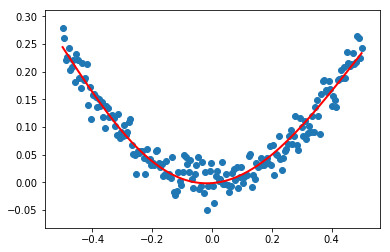

In [19]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]#随机点范围-0.5,0.5，np.newaxis是指增加一个维度，示例中是在列上增加一个维度成为二维
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义占位符
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义网络中间层
w1 = tf.Variable(tf.random_normal([1,10]))
b1 = tf.Variable(tf.random_normal([1,10]))
w1x_b1 = tf.matmul(x,w1) + b1
L1 = tf.nn.tanh(w1x_b1)

#定义网络的输出层
w2 = tf.Variable(tf.random_normal([10,1]))
b2 = tf.Variable(tf.zeros([1,1]))
w2x_b2 = tf.matmul(L1,w2) + b2
prediction = tf.nn.tanh(w2x_b2)

#定义二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

#梯度下降法
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(train,feed_dict={x:x_data,y:y_data})
    #获取预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=2)
    plt.show()